In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load, plot_sample, train, prepare_submission, get_cnn, get_fc, get_exactly_same_fc_with_blog

from datetime import datetime
import os
import time

import matplotlib.pyplot as pyplot
import tensorflow as tf

In [3]:
os.environ["FTRAIN"] = "/Users/fakenerd/Projects/kaggle/facial-keypoint-detection/training.csv"
os.environ["FTEST"] = "/Users/fakenerd/Projects/kaggle/facial-keypoint-detection/test.csv"

In [3]:
X, y = load()
X_test, _ = load(test=True)

print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(X.shape, X.min(), X.max()))
print("X_test.shape == {}; X_test.min == {:.3f}; X_test.max == {:.3f}".format(X_test.shape, X_test.min(), X_test.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(y.shape, y.min(), y.max()))

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
X_test.shape == (1783, 9216); X_test.min == 0.000; X_test.max == 1.000
y.shape == (2140, 30); y.min == -0.920; y.max == 0.996


In [4]:
num_epoch = 100
name = "mini_batch_with_shuffle"

y_pred = train(num_epoch, X_test, name, get_cnn)

Epoch:    1	Training Loss: 0.0099691	Elapsed Time(ms):  16612
Epoch:    2	Training Loss: 0.0076537	Elapsed Time(ms):  16793
Epoch:    3	Training Loss: 0.0057258	Elapsed Time(ms):  16549
Epoch:    4	Training Loss: 0.0062815	Elapsed Time(ms):  19410
Epoch:    5	Training Loss: 0.0067638	Elapsed Time(ms):  21815
Epoch:    6	Training Loss: 0.0045180	Elapsed Time(ms):  18266
Epoch:    7	Training Loss: 0.0056715	Elapsed Time(ms):  19129
Epoch:    8	Training Loss: 0.0052858	Elapsed Time(ms):  17013
Epoch:    9	Training Loss: 0.0049462	Elapsed Time(ms):  16670
Epoch:   10	Training Loss: 0.0050566	Elapsed Time(ms):  18337
Epoch:   11	Training Loss: 0.0050637	Elapsed Time(ms):  16478
Epoch:   12	Training Loss: 0.0038179	Elapsed Time(ms):  17238
Epoch:   13	Training Loss: 0.0044275	Elapsed Time(ms):  16518
Epoch:   14	Training Loss: 0.0055445	Elapsed Time(ms):  18767
Epoch:   15	Training Loss: 0.0052223	Elapsed Time(ms):  19177
Epoch:   16	Training Loss: 0.0035742	Elapsed Time(ms):  14762
Epoch:  

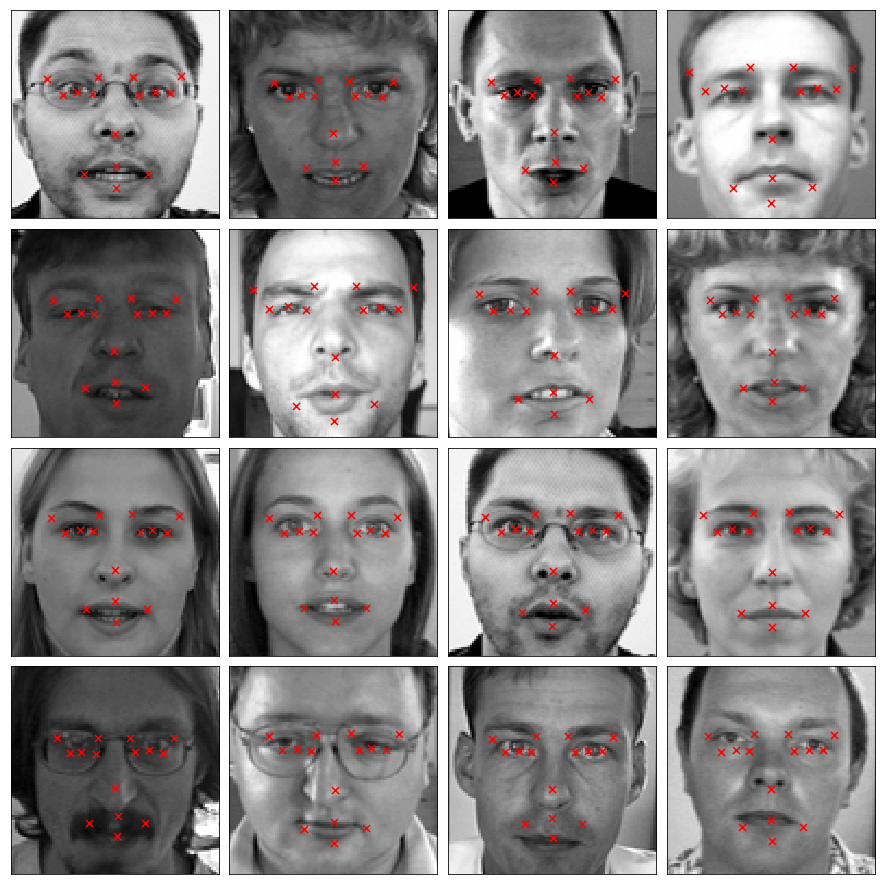

In [8]:
fig = pyplot.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_pred[i], ax)
    
pyplot.show()

In [5]:
X_test, _ = load(test=True)
submission_csv_path = prepare_submission(X_test, "20171229_10:24:39_mini_batch_with_shuffle", 100, get_cnn)
print("submission csv is saved at: {}".format(submission_csv_path))

INFO:tensorflow:Restoring parameters from /Users/fakenerd/Projects/kaggle/facial-keypoint-detection/checkpoints/20171229_10:24:39_mini_batch_with_shuffle/00100/ckpt
submission csv is saved at: /Users/fakenerd/Projects/kaggle/facial-keypoint-detection/submissions/20171229_10:24:39_mini_batch_with_shuffle_00100.csv
